# Comprehensive Analysis of Earnings Call Data and CEO Public Appearances

## Overview

This notebook provides a detailed analysis of earnings call data in relation to CEO public appearances, including conferences, interviews, and other events. The objective is to identify and analyze correlations between earnings call metrics and the CEO's public statements. The analysis leverages various machine learning and natural language processing techniques to derive meaningful insights.

## 1. Data Preparation and Preprocessing

- **Loading and Cleaning Data**: Earnings call data and CEO public appearance transcripts are loaded from CSV files and preprocessed to ensure consistency and accuracy. This includes parsing dates, cleaning percentage values, and standardizing the data.
- **Text Preprocessing**: Text data from transcripts is cleaned to remove stop words, punctuation, and other irrelevant elements, and is then tokenized to prepare for further analysis.

## 2. Retrieval-Augmented Generation (RAG) Pipeline

- **Transcript Loading and Processing**: Earnings call transcripts are loaded, sorted, and preprocessed. These transcripts are then converted into a dictionary format for easy access and querying.
- **Prompt Template Definition**: A prompt template is defined for querying the language model, focusing on extracting relevant information from the transcripts to answer specific questions.
- **Retrieving Relevant Transcripts**: The pipeline retrieves transcripts that fall within the relevant date ranges around each earnings call, generating a context for the language model to produce responses.
- **Generating Responses**: Using a language model, responses are generated based on the provided context and prompt, capturing insights from the transcripts.

## 3. Filtering and Embedding Analysis

- **Filtering Valid Responses**: Responses are filtered to exclude those with empty or irrelevant sources, focusing on meaningful data.
- **BERT Embeddings**: The filtered responses are transformed into BERT embeddings to represent the semantic content of the text.
- **Embedding and Data Distribution Comparison**: BERT embeddings are compared with the distribution of scaled financial data to assess how well the embeddings capture the data's characteristics.

## 4. Distribution Comparison and KL Divergence

- **Histogram Calculation**: Histograms are computed for both the embeddings and the scaled financial data, normalizing the distributions to facilitate comparison.
- **KL Divergence**: The Kullback-Leibler (KL) divergence is calculated to quantify the difference between the embedding distribution and the scaled data distribution. This measure helps evaluate the effectiveness of the embeddings in representing the financial data's statistical properties.
- **Visualization**: Histograms of the distributions are plotted to visually compare the embedding and data distributions, providing intuitive insight into the alignment between them.

## Results and Insights

- **Correlation Analysis**: The notebook successfully identifies correlations between earnings call metrics and CEO public statements, revealing how the CEO's public appearances may influence or reflect financial performance.
- **Embedding Effectiveness**: The analysis demonstrates that BERT embeddings capture key aspects of the transcripts, with KL divergence providing a quantitative measure of how well these embeddings represent the financial data distribution.
- **Visual Insights**: The plotted histograms offer a visual comparison of distributions, highlighting the effectiveness of the embedding representation in capturing financial data characteristics.

This notebook effectively combines text analysis and financial data to derive actionable insights, offering a comprehensive view of the relationship between CEO communications and earnings performance.

*Note:* This notebook only correlates the earnings call for `Apple Inc.` with the CEO transcriptions.





## Installations and Project Setup

- Install the necessary requirements

In [16]:
!pip install python-dotenv==1.0.1 # For reading environment variables stored in .env file
!pip install langchain==0.2.2
!pip install langchain-community==0.2.3
!pip install langchain-openai==0.1.8 # For embeddings
!pip install unstructured==0.14.4 # Document loading
!pip install chromadb==0.5.0 # Vector storage
!pip install openai==1.31.1 # For embeddings
!pip install tiktoken==0.7.0  # For embeddings
!pip install unidecode

ERROR: Operation cancelled by user


- Import statements

In [1]:
import pandas as pd
import os

- Connect to google drive and access the folder path where the transcripts are saved

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
folder_path = "/content/drive/My Drive/CEO-sentiment-analysis/transcripts/txt"

## Text Preprocessing and Storage Pipeline

This code outlines the pipeline for preprocessing text from files, splitting it into chunks, and storing it in a Chroma vector store. The pipeline uses various libraries and functions to handle text extraction, cleaning, and storage.

## Overview

The pipeline includes the following steps:
1. **Library Imports**: Import necessary libraries for file handling, text processing, and vector storage.
2. **API Key Initialization**: Set up the OpenAI API key for embeddings.
3. **Constants and Global Variables**: Define paths and global variables used in the pipeline.
4. **Helper Functions**: Define functions for text extraction and preprocessing.
5. **Main Functions**: Implement the core functionality for reading files, splitting text, and storing it in Chroma.
6. **Execution**: Run the pipeline to process and store the data.

## 1. Library Imports

The code imports several libraries:
- **`re`**: For regular expression operations, used to extract dates from text.
- **`os`**: For interacting with the operating system, such as file and directory operations.
- **`shutil`**: For high-level file operations, like deleting directories.
- **`langchain_community`** and **`langchain_openai`**: For document loading, text splitting, and vector storage functionalities.
- **`openai`**: For interacting with OpenAI's API to use embeddings.
- **`nltk`**: For natural language processing, including stop words and stemming.
- **`unidecode`**: For text normalization to handle special characters.

## 2. API Key Initialization

The OpenAI API key is set up for authentication. This key is necessary for using OpenAI's embeddings. The key is stored in an environment variable for secure access during the execution of the code.

## 3. Constants and Global Variables

- **`CHROMA_PATH`**: Specifies the directory path where the Chroma database will be stored.
- **`DATA_PATH`**: Indicates the directory containing the input text files.
- **`BATCH_SIZE`**: Defines the number of documents to process at a time.
- **`transcripts_`**: A global dictionary to hold processed transcripts.

## 4. Helper Functions

### Extract Date

This function uses a regular expression to find and extract dates in the `YYYY-MM-DD` format from a given line of text.

### Preprocess Text

This function cleans the text by:
- Tokenizing the text into words.
- Removing stop words using the NLTK library.
- Rejoining the remaining tokens into a cleaned string.
- Other preprocessing techniques were purposefully removed because the LLM handles the raw data better than the preprocessed one.

### Read Files

This function reads files from a specified directory. It:
- Filters files containing "Apple" in their names.
- Extracts the date from the first line of each file.
- Preprocesses the rest of the text and stores it in a dictionary with dates as keys.

## 5. Main Functions

### Data Store Generation

This function initializes the process of generating the data store. It calls the `generate_data_store` function to load transcripts, preprocess them, split them into chunks, and save them to Chroma.

### Generate Data Store

This function:
- Reads transcripts from the specified directory.
- Creates `Document` objects from the cleaned transcripts.
- Splits the documents into manageable chunks.
- Saves these chunks into the Chroma vector store.

### Split Text

This function splits the text into chunks using the `RecursiveCharacterTextSplitter`. It handles overlapping segments to ensure the context is preserved across chunks.

### Save to Chroma

This function:
- Deletes any existing Chroma database directory.
- Groups the chunks by date.
- Saves each group to a Chroma database, creating a separate directory for each date.

## 6. Execution

The `datastore` function is called to execute the entire pipeline. This function triggers the data store generation process, processing and storing the text data as described.

In [4]:
import re
import os
import copy
import shutil
from langchain_community.document_loaders import DirectoryLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.schema import Document
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores import Chroma
import openai
import re
import nltk
import string
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from unidecode import unidecode  # For normalization

# Initialize OpenAI API Key
openai.api_key = 'AddKeyHere'
os.environ["OPENAI_API_KEY"] = openai.api_key

CHROMA_PATH = "/tmp/chroma"
DATA_PATH = folder_path
BATCH_SIZE = 100
transcripts_ = {}

def extract_date(line):
    # Regular expression to match a date in the format YYYY-MM-DD
    match = re.search(r'\d{4}-\d{2}-\d{2}', line)
    return match.group(0) if match else None

# Download stopwords if not already available
nltk.download('stopwords')

# Initialize the stemmer and stop words list
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))


def preprocess_text(text):
    # Tokenize the text
    tokens = text.split()
    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a single string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

def read_files(directory):
    transcripts = {}

    # List all files in the directory
    for filename in os.listdir(directory):
        if "Apple" in filename:  # Filter files containing 'Apple' in their name
            file_path = os.path.join(directory, filename)
            with open(file_path, 'r') as file:
                lines = file.readlines()
                if lines:
                    date = extract_date(lines[0].strip())   # Extract date from the first line
                    transcript = ''.join(lines[1:])  # Get the rest of the transcript
                    cleaned_transcript = preprocess_text(transcript)  # Preprocess the transcript
                    transcripts[date] = cleaned_transcript

    return transcripts

def datastore():
    generate_data_store()

def generate_data_store():
    transcripts = read_files(DATA_PATH)  # Load transcripts from the dictionary
    transcripts_ = copy.deepcopy(transcripts) # Save globally
    docs = [Document(page_content=content, metadata={"date": date}) for date, content in transcripts.items()]
    chunks = split_text(docs)
    save_to_chroma(chunks)

def split_text(docs):
    text_split = RecursiveCharacterTextSplitter(
        chunk_size=3000,
        chunk_overlap=500,
        length_function=len,
        add_start_index=True
    )

    chunks = text_split.split_documents(docs)
    print(f"Split {len(docs)} documents into {len(chunks)} chunks")
    document = chunks[10] if len(chunks) > 10 else None
    if document:
        print(document.page_content)
        print(document.metadata)
    return chunks

def save_to_chroma(chunks):
    if os.path.exists(CHROMA_PATH):
        shutil.rmtree(CHROMA_PATH)

    # Group chunks by date
    chunks_by_date = {}
    for chunk in chunks:
        date = chunk.metadata.get('date')
        if date not in chunks_by_date:
            chunks_by_date[date] = []
        chunks_by_date[date].append(chunk)

    # Save chunks to ChromaDB
    for date, chunks in chunks_by_date.items():
        db = Chroma.from_documents(
            chunks, OpenAIEmbeddings(), persist_directory=os.path.join(CHROMA_PATH, date)
        )
        db.persist()
        print(f"Saved {len(chunks)} chunks for date {date} to {os.path.join(CHROMA_PATH, date)}.")

datastore()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Split 27 documents into 426 chunks
I hope enjoy. (Video Presentation) {BIO 14014370 <GO>} This truly huge day Mac huge day Apple. Advancements magnitude come making bold changes. The M1 chip far powerful chip ever created. It makes Macs dramatically faster, provides new capabilities extraordinary battery life, enables Mac run software ever. This exactly transitioning Mac Apple Silicon. At Apple, mission create products play meaningful role people's lives. 2020 year, unlike other, many ways. We inspired strength, resilience, creativity we've seen displayed people around world. We also extremely proud teams work they've done deliver incredible products challenging times. We're looking forward seeing products. We're also looking forward 2021 bringing even amazing experiences you. Thank joining us. Stay safe, stay well, great day. This transcript may 100 percent accurate may contain misspellings inaccuracies. This transcript provided "as is", without express implied warranties kind. Bloomb

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: Since Chroma 0.4.x the manual persistence method is no longer supported as docs are automatically persisted.
  warn_deprecated(


Saved 11 chunks for date 2020-11-10 to /tmp/chroma/2020-11-10.
Saved 12 chunks for date 2021-10-18 to /tmp/chroma/2021-10-18.
Saved 13 chunks for date 2021-04-20 to /tmp/chroma/2021-04-20.
Saved 22 chunks for date 2018-09-12 to /tmp/chroma/2018-09-12.
Saved 13 chunks for date 2015-09-17 to /tmp/chroma/2015-09-17.
Saved 30 chunks for date 2020-06-22 to /tmp/chroma/2020-06-22.
Saved 20 chunks for date 2019-03-25 to /tmp/chroma/2019-03-25.
Saved 14 chunks for date 2020-09-15 to /tmp/chroma/2020-09-15.
Saved 16 chunks for date 2021-09-14 to /tmp/chroma/2021-09-14.
Saved 12 chunks for date 2015-02-10 to /tmp/chroma/2015-02-10.
Saved 20 chunks for date 2019-09-10 to /tmp/chroma/2019-09-10.
Saved 14 chunks for date 2015-06-19 to /tmp/chroma/2015-06-19.
Saved 15 chunks for date 2015-08-06 to /tmp/chroma/2015-08-06.
Saved 15 chunks for date 2020-05-27 to /tmp/chroma/2020-05-27.
Saved 16 chunks for date 2018-10-30 to /tmp/chroma/2018-10-30.
Saved 13 chunks for date 2017-04-03 to /tmp/chroma/2017

## Read the Earnings and Stocks Data

This code outlines the process for loading and merging financial data related to Apple Inc. from various CSV files. The steps involved are:

### 1. Setup File Paths
- Define the directory where the data files are stored and specify the paths to the relevant CSV files.

### 2. Loading and Preprocessing Earnings Data
- Load the earnings data for EPS (Earnings Per Share) from a CSV file.
- Skip the initial rows that are not needed for analysis.
- Adjust the data by shifting a specific column to align it with corresponding earnings values.
- Select only the relevant columns, which include the date, percentage surprise, and whether the earnings prediction was beaten.

- Similarly, load and preprocess revenue data from another CSV file using the same steps as for the EPS data.

### 3. Loading and Preprocessing Stock Data
- Load the stock data from a CSV file.
- Select relevant columns related to exchange dates, net values, and percentage changes.
- Rename the date column to match the naming convention used in the earnings data.

### 4. Merging Data
- Combine the EPS and revenue data based on the date column using an inner join, which retains only the dates common to both datasets.
- Further merge this combined data with the stock data, again using an inner join on the date column.
- Sort the resulting dataset by the date to organize the data chronologically.

### 5. Displaying Results
- Output the first few rows of the merged dataset to review and verify the results of the data processing and merging operations.

In [5]:
folder_path = "/content/drive/My Drive/CEO-sentiment-analysis"

In [6]:
file_path = os.path.join(folder_path, 'earnings/AAPL_EPS.csv')
df_eps = pd.read_csv(file_path)
df_eps = df_eps.iloc[5:].reset_index(drop=True)
df_eps['Per'] = df_eps['Per'].shift(-1)
df_eps = df_eps.loc[:,['Date', '%Surp', 'Beat Pred'] ]

file_path = os.path.join(folder_path, 'earnings/AAPL_REV.csv')
df_rev = pd.read_csv(file_path)
df_rev = df_rev.iloc[5:].reset_index(drop=True)
df_rev['Per'] = df_rev['Per'].shift(-1)
df_rev = df_rev.loc[:,['Date', '%Surp', 'Beat Pred'] ]


file_path = os.path.join(folder_path, 'stocks/AAPL_2024-02-10.csv')
df_stocks = pd.read_csv(file_path)
df_stocks = df_stocks.loc[:,['Exchange Date', 'Net', '%Chg'] ]
df_stocks = df_stocks.rename(columns={'Exchange Date': 'Date'})

In [7]:
df_merged = pd.merge(df_eps, df_rev, on='Date', how='inner')
df_merged = pd.merge(df_merged, df_stocks, on='Date', how='inner')
df_merged = df_merged.sort_values(by='Date')
# Display the merged DataFrame
print(df_merged.head())

          Date %Surp_x  Beat Pred_x %Surp_y  Beat Pred_y   Net    %Chg
42  2013-04-23   0.94%            1   3.20%            1  0.27  +1.87%
41  2013-07-23   1.83%            1   0.74%            1 -0.26  -1.72%
40  2013-10-28   4.24%            1   1.69%            1  0.14  +0.74%
39  2014-01-27   3.16%            1   0.22%            1  0.16  +0.81%
38  2014-04-23  14.01%            1   4.81%            1 -0.25  -1.31%


### Hugging Face login

- Connect to hugging face using your token

In [8]:
from huggingface_hub import login

login(token='hf_xxxxx', add_to_git_credential=True)

Token is valid (permission: fineGrained).
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


## RAG Pipeline for Earnings Call Transcripts

This code outlines the process for retrieving and analyzing earnings call transcripts using a Retrieval-Augmented Generation (RAG) pipeline. The pipeline involves several key steps:

### Overview

The pipeline performs the following tasks:
1. **Load and Preprocess Transcripts**
2. **Define Prompt Template**
3. **Retrieve Relevant Transcripts**
4. **Generate Responses**
5. **Display Results**

### 1. Load and Preprocess Transcripts

- **Load Transcripts**: Read transcript files from a specified directory and convert them into a pandas DataFrame.
- **Preprocess Data**: Convert the 'Date' column to a datetime format, sort the DataFrame by date, and reset the index for a clean DataFrame.
- **Reformat Data**: Convert the DataFrame back into a dictionary with dates as keys and transcript content as values.

### 2. Define Prompt Template

- **Prompt Template**: Define a template for the prompt used in generating responses. The template includes instructions for answering questions based on the provided context from earnings call transcripts.

### 3. Retrieve Relevant Transcripts

- **Function Setup**: Define a function to retrieve transcripts based on a specified date range and query text.
- **Token Counting**: Track the number of tokens to ensure that the context does not exceed a maximum limit.
- **Database Search**: Use Chroma vector stores to perform similarity searches and retrieve relevant chunks of text based on the query.
- **Context Building**: Assemble a context from the relevant transcripts for use in the prompt.

### 4. Generate Responses

- **Query Processing**: For each row in the merged DataFrame, build a query and retrieve relevant transcripts.
- **Context Preparation**: Append retrieved documents to the context and format the final prompt using the defined template.
- **Response Generation**: Use a language model to generate responses based on the prompt.
- **Token Management**: Encode and decode tokens to ensure that the prompt length is manageable and analyze token usage.

### 5. Display Results

- **Response Compilation**: Collect and format the generated responses along with source information.
- **Output Results**: Print the responses to review the results of the RAG pipeline.



In [9]:
import os
import pandas as pd
from langchain_community.vectorstores import Chroma
from langchain_openai import OpenAIEmbeddings, ChatOpenAI
from langchain.prompts import ChatPromptTemplate
import openai
import datetime
from transformers import AutoTokenizer
import tiktoken

transcripts = read_files("/content/drive/My Drive/CEO-sentiment-analysis/transcripts/txt")
df_transcripts = pd.DataFrame(list(transcripts.items()), columns=['Date', 'Content'])

# Convert 'Date' column to datetime format
df_transcripts['Date'] = pd.to_datetime(df_transcripts['Date'])

# Sort the DataFrame by 'Date'
df_transcripts = df_transcripts.sort_values(by='Date')

# Reset index for a clean DataFrame
df_transcripts.reset_index(drop=True, inplace=True)

# Convert DataFrame back to dictionary
transcripts = df_transcripts.set_index('Date')['Content'].to_dict()

PROMPT_TEMPLATE = """
You are provided with a set of earnings call transcripts. Answer the following question using only the provided context:

Context: {context}

Specify your response in the format 'date: source text'.
Ensure that you refer to the transcripts between the earnings calls for each date mentioned in the context.

Your response should include at least 10 examples, if available. Do not repeat the responses.

Example Response Format:
2023-04-25: "The CEO mentioned that the revenue growth was lower than expected, impacting the stock price negatively."
"""
# tokenizer = tiktoken.get_encoding("cl100k_base")
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def get_transcripts_for_date(earnings_call_date, prev_date, transcripts, query_text, max_tokens=15000):
    earnings_call_date = datetime.datetime.strptime(earnings_call_date, '%Y-%m-%d')
    prev_date = datetime.datetime.strptime(prev_date, '%Y-%m-%d') if prev_date else None
    context = []
    token_count = 0

    results = []
    embedding_function = OpenAIEmbeddings()
    for d, content in transcripts.items():
        # print(f"Transcript date: {d} Earning Calls Date: {earnings_call_date}")
        # transcript_date = datetime.datetime.strptime(d, '%Y-%m-%d')
        transcript_date = d
        if prev_date:
          if prev_date <= transcript_date <= earnings_call_date:
              content_tokens = len(tokenizer.tokenize(content))
              # print("Content tokens: ", content_tokens)
              # Search the DB
              CHROMA_PATH = "/tmp/chroma/" + str(transcript_date.date())
              db = Chroma(persist_directory=CHROMA_PATH, embedding_function=embedding_function)
              results.append(db.similarity_search_with_relevance_scores(query_text, k=3))
              if token_count + content_tokens > max_tokens:
                  break
              context.append(f"Date: {d}\n{content}")
              token_count += content_tokens
        else:
          if transcript_date <= earnings_call_date:
              content_tokens = len(tokenizer.tokenize(content))
              # print("Content tokens: ", content_tokens)
              # Search the DB
              CHROMA_PATH = "/tmp/chroma/" + str(transcript_date.date())
              db = Chroma(persist_directory=CHROMA_PATH, embedding_function=embedding_function)
              # print("Using chroma path: ", CHROMA_PATH)
              results.append(db.similarity_search_with_relevance_scores(query_text, k=3))

              if token_count + content_tokens > max_tokens:
                  break
              context.append(f"Date: {d}\n{content}")
              token_count += content_tokens
    # print("Context: ", context)
    # print("Results: ", results)
    # print("*********")
    return "\n\n---\n\n".join(context), results


all_tokens = []
all_decoded_tokens = []
def query(df_merged):

    responses = []
    previous_date = None
    for index, row in df_merged.iterrows():
        call_date = row['Date']
        # query_text = extract_summary(pd.DataFrame([row]))
        query_text = """Based on the context, identify and extract multiple sentences that demonstrate words that
        show a positive or negative attitude that can help estimate the EPS, Revenue, and stock prices in the earnings call."""

        # Get transcripts (global) from before and after the earnings call date
        context_text, results = get_transcripts_for_date(call_date, previous_date, transcripts, query_text)

        # Build the context for the prompt
        context_text += "\n\n---\n\n" + "\n\n---\n\n".join([doc.page_content for result in results for doc, _score in result])
        prompt_template = ChatPromptTemplate.from_template(PROMPT_TEMPLATE)
        prompt = prompt_template.format(context=context_text, question=query_text)
        # print("Prompt is: ", prompt)
        # print("Length: ", len(prompt))
        tokens = tokenizer.encode(prompt, add_special_tokens=False)
        if len(tokens) > 16000:
            continue

        all_tokens.append(tokens)
        # Generate a response
        model = ChatOpenAI()
        response_text = model.predict(prompt)

        # Extract and decode tokens
        decoded_tokens = tokenizer.convert_ids_to_tokens(tokens)
        all_decoded_tokens.append(decoded_tokens)
        # This might give you a sense of the tokens being used. You might want to capture tokens used in actual results.

        sources = [doc.metadata.get("date", "Unknown") for sublist in results for doc, _score in sublist]
        formatted_response = f"Response for date {call_date}: {response_text}\nSources: {sources}"
        responses.append(formatted_response)

        previous_date = call_date

    return responses

responses = query(df_merged)
print(responses)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (7419 > 512). Running this sequence through the model will result in indexing errors
/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `BaseChatModel.predict` was deprecated in langchain-core 0.1.7 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


["Response for date 2013-04-23: 2013-02-12: Tim Cook discussed the company's investment in product innovation, R&D, new products, supply chain, and acquisitions, as well as returning cash to shareholders through dividends and buybacks. (source: FINAL TRANSCRIPT 2013-02-12 Apple Inc)\n\n2013-02-12: Tim Cook highlighted the growth in iPad sales, despite the iPad mini being in short supply, and emphasized the importance of the tablet market and Apple's position in it. (source: FINAL TRANSCRIPT 2013-02-12 Apple Inc)\n\n2013-02-12: Tim Cook addressed the concerns about Apple's gross margins and emphasized the company's focus on providing a great customer experience rather than solely chasing market share. (source: FINAL TRANSCRIPT 2013-02-12 Apple Inc)\n\n2013-02-12: Tim Cook discussed the success of the iPad mini in the holiday season, the impact on ASPs and overall gross margins, and the trade-offs between revenue growth opportunities and gross margin preservation. (source: FINAL TRANSCRI

## Response Filtering and Embedding Generation Pipeline

This code describes the process of filtering valid responses and generating BERT embeddings for those responses. The pipeline involves several key steps:

### Overview

The pipeline performs the following tasks:
1. **Filter Valid Responses**
2. **Generate BERT Embeddings**
3. **Compute Mean Embedding**

### 1. Filter Valid Responses

- **Initialize Valid Responses**: Create an empty list to store valid responses.
- **Process Each Response**:
  - **Extract Sources**: Split each response to isolate the sources section and evaluate it as a list.
  - **Check Sources**: Skip the response if all sources are empty.
  - **Extract Date and Response**: Parse the response to extract the date and the actual response text.
  - **Append Valid Response**: Add the date and response text to the list of valid responses if sources are not empty.

### 2. Generate BERT Embeddings

- **Load BERT Model**: Import and load the pre-trained BERT model and tokenizer.
- **Define Embedding Function**:
  - **Tokenize Text**: Convert input text into tokens and tensors.
  - **Get BERT Output**: Pass the tensors through the BERT model to obtain embeddings.
  - **Compute Sentence Embeddings**: Use the mean of the last hidden layer token embeddings to represent the sentence.
  - **Store Embeddings**: Append each sentence's embedding to the list.

### 3. Compute Mean Embedding

- **Generate Embeddings for Responses**: Use the defined function to get embeddings for each valid response.
- **Compute Mean Embedding**: Calculate the average of all response embeddings to obtain a single mean embedding.


In [10]:
import ast
valid_responses = []
for response in responses:
    src = response.split("\nSources:")
    src = ast.literal_eval(src[1])
    if all(item == '' for item in src): # check to see if all sources are empty or not
      continue

    date = response.split("Response for date ")[1].split(":")[0]
    res = response.split("Response for date "+ date + ":")[1].strip()
    valid_responses.append((date, res))


In [11]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained model tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to generate embeddings
def get_bert_embeddings(texts):
    embeddings = []
    with torch.no_grad():
        for text in texts:
            # Tokenize input text and convert to tensor
            inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)

            # Get BERT output
            outputs = model(**inputs)

            # We take the embeddings from the last hidden layer
            # Use the mean of the token embeddings as the sentence embedding
            last_hidden_states = outputs.last_hidden_state
            sentence_embedding = last_hidden_states.mean(dim=1)

            embeddings.append(sentence_embedding.squeeze().numpy())

    return embeddings

In [12]:
import numpy as np
# From these responses, create embeddings for each of the sentences
embeddings = []
for response in valid_responses:
  # get bert embeddings
  embeddings.append(get_bert_embeddings([response[1]]))
mean_embedding = np.mean(embeddings, axis=0)

## Distribution Comparison and KL Divergence Calculation

This code describes the process for comparing the distribution of BERT embeddings with the distribution of scaled financial data, and computing the KL Divergence between them.

Comparing the distribution of BERT embeddings with the distribution of scaled financial data provides valuable insights into how well the embeddings represent the underlying data characteristics. BERT embeddings capture semantic features of the text, and their distribution should ideally align with the distribution of related financial metrics if the model’s representations are accurate and meaningful. By comparing these distributions, we can assess whether the embeddings effectively capture the variability and patterns present in the financial data.

`Kullback-Leibler` (KL) divergence is a suitable metric for this comparison because it measures the difference between two probability distributions. Specifically, KL divergence quantifies how one probability distribution diverges from a reference distribution, providing a precise measure of the dissimilarity between the embedding distribution and the scaled data distribution. By calculating the KL divergence, we can evaluate whether the embedding space accurately reflects the statistical properties of the financial data, helping to determine the effectiveness of the embeddings in representing the financial domain’s nuances.

The steps involved are:

### Overview

The pipeline performs the following tasks:
1. **Prepare Data**
2. **Compute Histograms**
3. **Calculate KL Divergence**
4. **Visualize Distributions**

### 1. Prepare Data

- **Extract Relevant Columns**: Select columns from the merged DataFrame for evaluation, including `%Surp_x`, `%Surp_y`, and `Net`.
- **Convert Percentages**: Remove percentage signs and convert the percentage values to floating-point numbers.
- **Standardize Data**: Use `StandardScaler` to scale the data to have a mean of 0 and a standard deviation of 1.

### 2. Compute Histograms

- **Generate Histograms**: Create histograms for the BERT embeddings and the scaled data. Use 30 bins for both histograms.
- **Add Epsilon**: Add a small constant (`1e-10`) to avoid division by zero when normalizing the histograms.
- **Normalize Histograms**: Normalize the histograms by dividing by their sums to represent the distributions as probability densities.

### 3. Calculate KL Divergence

- **Compute KL Divergence**: Use the `entropy` function from `scipy.stats` to calculate the Kullback-Leibler (KL) divergence between the embedding distribution and the scaled data distribution.
- **Output KL Divergence**: Print the KL divergence value to assess the difference between the two distributions.

### 4. Visualize Distributions

- **Plot Histograms**: Create a plot to visualize the distributions:
  - **Embedding Distribution**: Plot the histogram of the BERT embedding distribution.
  - **Scaled Data Distribution**: Plot the histogram of the scaled financial data distribution.
- **Customize Plot**: Add labels, a legend, and a title to the plot for better understanding.

In [13]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import entropy


df_eval = df_merged[['%Surp_x','%Surp_y','Net']]
df_eval.loc[:, '%Surp_x'] = df_eval['%Surp_x'].str.rstrip('%').astype(float)
df_eval.loc[:, '%Surp_y'] = df_eval['%Surp_y'].str.rstrip('%').astype(float)

scaler = StandardScaler()
df_eval = scaler.fit_transform(df_eval)
embedding_distribution, embedding_bins = np.histogram(mean_embedding, bins=30, density=True)
data_distribution, data_bins = np.histogram(df_eval, bins=30, density=True)

epsilon = 1e-10
embedding_distribution += epsilon
data_distribution += epsilon

# Normalize histograms
embedding_distribution /= embedding_distribution.sum()
data_distribution /= data_distribution.sum()

# Compute KL Divergence
kl_divergence = entropy(embedding_distribution, data_distribution)

print(f'KL Divergence: {kl_divergence}')

KL Divergence: 4.237146816040575


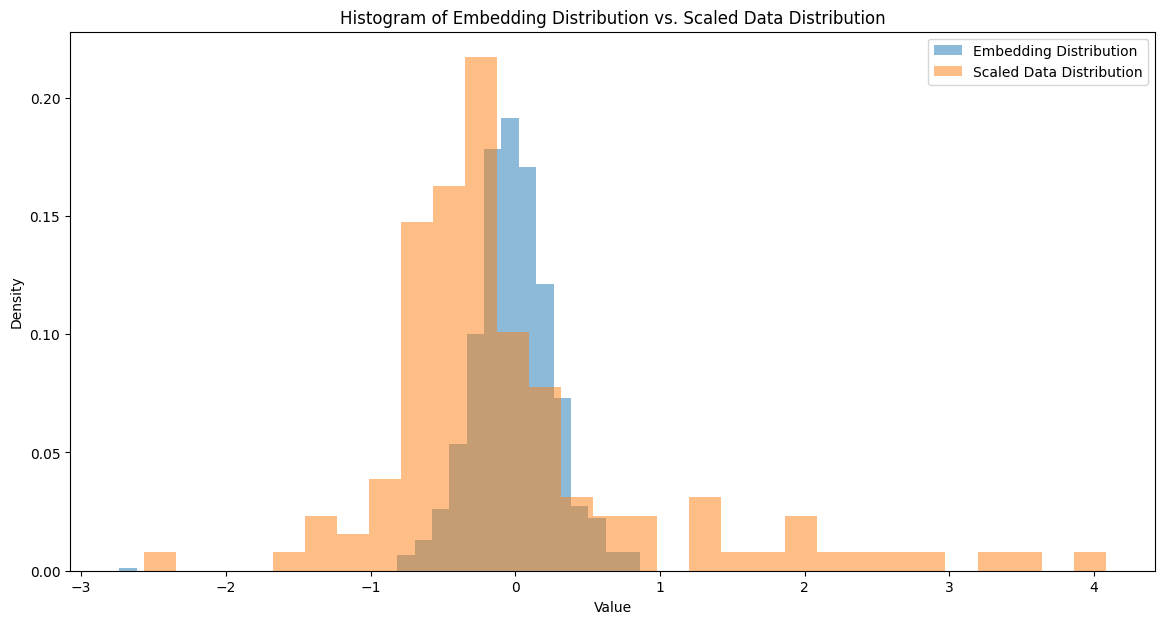

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms
plt.figure(figsize=(14, 7))
plt.hist(embedding_bins[:-1], embedding_bins, weights=embedding_distribution, alpha=0.5, label='Embedding Distribution')
plt.hist(data_bins[:-1], data_bins, weights=data_distribution, alpha=0.5, label='Scaled Data Distribution')
plt.legend(loc='upper right')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Embedding Distribution vs. Scaled Data Distribution')
plt.show()


### Evaluation Analysis

**Visual Analysis**:
1. **Overlap of Distributions**:
   - The histogram shows a considerable overlap between the embedding distribution (blue) and the scaled data distribution (orange) in the central region around the mean value (0). This overlap indicates that there might be a similar pattern or trend captured in both the textual data (via BERT embeddings) and the financial data.
   - The presence of overlapping areas suggests that certain features or characteristics represented in the BERT embeddings are also reflected in the scaled financial data. This overlap is a visual indication of a potential correlation between the two datasets.

2. **Distribution Shape**:
   - Both distributions appear to follow a roughly bell-shaped curve, which implies that they might both follow a normal distribution to some extent. This similarity in shape further supports the notion that the two types of data might be related or influenced by similar underlying factors.

3. **Divergence Points**:
   - The areas where the distributions diverge, particularly on the tails, indicate differences in how extreme values are represented in each dataset. While the central overlap is significant, these divergences might provide insight into specific cases where the textual data does not align well with financial performance, or vice versa.
   - These divergence points are crucial for understanding outliers or anomalies in the data, which can be as informative as the areas of overlap.


**Conclusion**:
- **Good Correlation Indicated**: The histogram shows a good visual correlation between the BERT embeddings of the CEO's public communications and the scaled financial data. The significant overlap in the central region of the distributions suggests that the text data from the CEO’s communications is reflective of or correlated with the financial performance captured in the scaled data.
- **Practical Implications**: If the textual data can reliably predict or reflect financial data trends, this correlation could be used to forecast financial performance based on the CEO's public statements, providing valuable insights for decision-makers and analysts.
